<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/regressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


regressão linear simples é chamada de regressão linear por conta da linearidade dos pontos, a linha é chamada de linha de regressão ou linha de melhor ajuste para fazermos previsão de valores que ainda não conhecemos.

pontos na horizontal e na vertical nao tem covariancia


# Correlação

A relação matemática que veremos mostra:
* força e a dirção da relação entre as varáveis
* pode ser um valor entre -1 e 1
* a correlação de A-B é a mesma que B-A

A correlação pode ser qualquer valor real entre 1 e -1, quando mais proximo de 1 e mais proximo de -1 mais forte a correlação é, quanto mais proxima de 0 mais fraca ela é.

* 1 -> perfeita
* 0.7 -> forte
* 0.5 -> moderada
* 0.25 -> fraca
* 0 -> inexistente
* -0.25 -> fraca
* -0.5 -> moderada
* -0.7 -> forte
* -1 -> perfeita

A correlação indica a força e a direção.




# Forte - Fraca

Quando temos uma concentração de dados proximos e calcularmos a correlação os dados serão altos. se os dados estiverem mais espalhados a correlação é baixa.

# Positiva - Negativa

Correlação positiva tende a uma inclinação positiva, ja a negativa tem uma inclinação negativa (linha invertida)

# Coeficiente de determinação (R²)

* Mostra o quanto o modelo consegye exolicar os valores
* quanto maior mais explicativo ele é
* varia entre 0 até 1
(sempre positivo)
* calcula-se com o quadrato do coeficiente de correlação (R)

se a correlação for 0.93 teremos R²= 0.86 - relação positiva forte


# Previsão

A parte mais importante da regressão é a construção do modelo, a partir da lista de relação construida conseguimos fazer previsões.

como faremos?

Construindo uma linha onde:
* ponto de enocontro da linha no eixo Y (interseção): x=0
* Aumenta a variavel idependente de (x) a variavel de resposta (y) sobe o valor da inclinação

mas a previsão será feita com a linha de melhor ajuste, e nao de pontos.

então como prevemos?

* Previsão = Interseção  + (Inclinação * valor a prever)
* quanto vai custar um cliente com 56 anos de idade?
* ex: x = 558,94 + (61,86 * 56) = 2905.22


# modelo

 Nos temos a linha de melhor ajuste, que é criada para fazer previsões, essa linah deve ser uma linha generica que nao deve está sob ou super ajustada ao modelo, pode conencidir com os pontos mas geralmente não.

 a diferença da o espaço da variavel para a linha é chamado de resíduo, que pode ser calculado.

 se a variavel estiver a cima da linha o residuo será positivo, se estiver abaixo será negativo, se estiver em cima da linha será zero.

 ### valores ajustados

 é o valor do ponto na linha de regressao, a linha é construida por pontos imaginarios..





# Outiliers

Surge um novo cliente no plano de saude e um rapaz de 24 anos paga 3845, totalmente diferente para a idade dele. o quanto isso influencia no nosso modelo?
A correlção mudaria de 0.9 para 0.3

então, o que fazer?
Primeiro precisamos avaliar se o caso deve fazer parte do modelo, se foi um erro ou se é um fato que existe em alguns casos.

# Condições

* esperamos que a correlação entre as variaveis seja moderada a forte (negativa ou positiva)
* Coeficienente de determinação acima de 0.7
* residuais padronizados, esperemos que esses residuos estejam proximos de uma distribuição normal.




# Regressão simples e multipla

* simples
  * uma variavel explanatoria para prever uma variavel dependente
  * y - x

* multipla
  * duas ou mais variaveis explanatorias para prever uma variavel dependente
  * y - x1 + x2 + xn

Nem sempre tendo mais variaveis explanatorias melhor, as vezes os modelos mais simples tem uma performace melhor.

## analisar cada x com y

* analisar cada variavel idependente com y indivisualmente
* gerar grafico de dispressao individual
* buscar redundancias (mesmo efeitos de x sobre y)

## coeficiente de determinação
* lembrando que o R² é o percentual de variaçao da variavel de resposta que é explicada pelo modelo

## Colinearidade e Parcimônia
* colinearidade: duas variaveis idependentes sao correlacionadas
* incluir variaveis independentes colineares pode prejudicar o modelo criando previsoes nao confiaveis
* parcimonia: nao colocar variaveis que não melhorem o modelo em nada: criar modelos parcimonios.

## Requisitos barsicos

* Linearidade entre as variaveis dependentes ou idenpendentes
* pouca ou nenhuma colineairdade

## residuos

* proximos a uma distribuição normal
* variancia constante em relacao a linha
* idependentes (sem padrao)



# calculos

Temos algumas etapas relacionadas:

1. Correlação
2. inclinação
3. interceptação
4. previsão



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# morning
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as sm #modelo diferente de regressao

In [7]:
# carregamento da base
base = pd.read_csv('cars.csv')
base.shape

(50, 3)

In [8]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [9]:
base = base.drop(['Unnamed: 0'], axis=1) #removemos a primrira cooluna
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [10]:
# definicao das variaveis x, y, x distancia e a variavel independente de y é a variavel dependente
x = base.iloc[:, 1].values # distancia, variavel indenpendente
y = base.iloc[:, 0].values # velocidade, variavel dependente
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [12]:
# calculo correlaçao entre x e y
correlacao = np.corrcoef(x, y) # coeficiente de correlação R
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [13]:
# formato de matriz de uma coluna a mais
x = x.reshape(-1, 1) # transformando o x em uma matriz com mais de uma coluna
# criacao do modelo de treinamento
modelo = LinearRegression() # criamos o modelo
modelo.fit(x, y) # baseado na interciptação com o aixo y e a x

LinearRegression()

In [14]:
# vizualizando os coeficientes
modelo.intercept_ # interceptação

8.283905641787172

In [16]:
modelo.coef_ # inclinação, o quanto a variavel y cresce quando a variavel x cresce

array([0.16556757])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

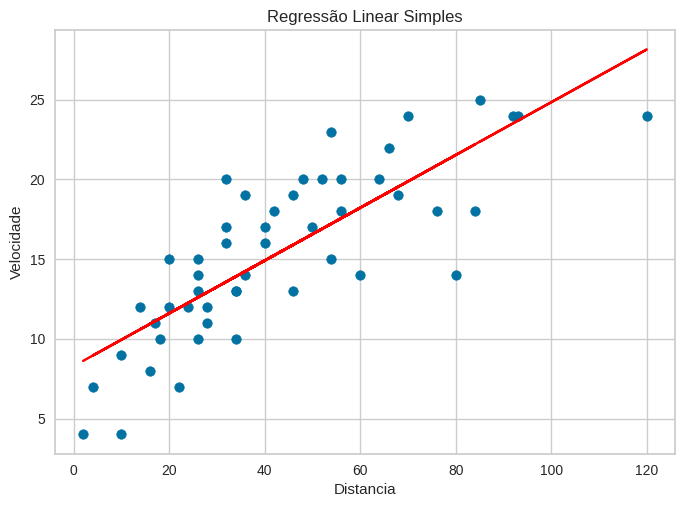

In [17]:
# gerando grafico com pontos
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color='red')
plt.title('Regressão Linear Simples')
plt.xlabel('Distancia')
plt.ylabel('Velocidade')
plt

In [18]:
#previsão da distancia 22 pés usando a formula manual
#interceptação * inclinação * valor dist
# qual a valicidade aproximada do veiculo 22 pes pra parar?
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [19]:
# previsao utilizando a funcao sklearn
modelo.predict([[22]])

array([11.92639228])

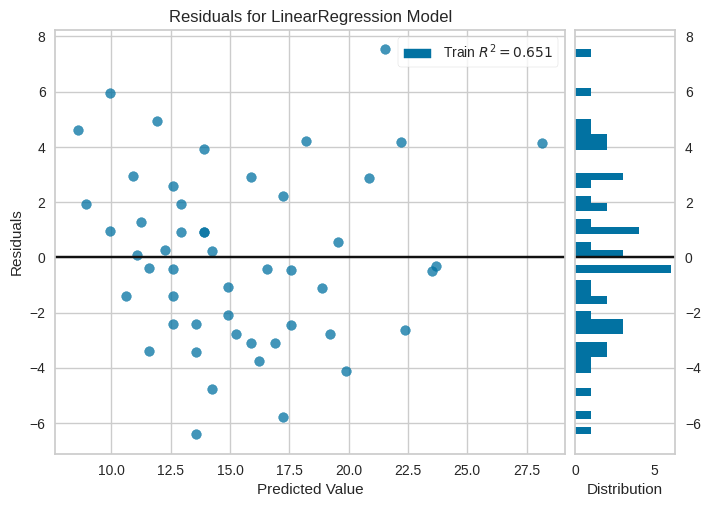

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
# vizualizar residuais
vizualizador = ResidualsPlot(modelo)
vizualizador.fit(x, y)
vizualizador.poof()

não existe uma padronização, os dados estão aleatórios, o histograma tambem lembra uma distribuição normal.

In [28]:
base_car = pd.read_csv('mt_cars.csv')
base_car.shape

(32, 12)

In [29]:
base_car.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [31]:
base_car = base_car.drop(['Unnamed: 0'], axis=1)
base_car.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [33]:
# criação de x e y: variavel independente e varivavel dependente
x = base_car.iloc[:, 2].values #coluna disp
y = base_car.iloc[:, 0].values #coluna mpg
corralacao_car = np.corrcoef(x, y)
corralacao_car

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [35]:
x = x.reshape(-1, 1) # mudança de x para  formato de matiz

In [36]:
model = LinearRegression() #criar modelo
model.fit(x, y) #treinar modelo

LinearRegression()

In [42]:
#interceptação
model.intercept_ #dados encontram o eixo y

29.599854756163946

In [43]:
#inclinação da reta
model.coef_

array([-0.04121512])

In [44]:
#score r²
model.score(x, y)

0.7183433404897299

In [49]:
provisoes = model.predict(x) # previsões com o x
provisoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [46]:
#criaçao do modelo usando a biblioteca statsmodel com o r ajustado r²
# mpg ~ disp : variavel dependente a direita e variavel idependente a esquerda
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = base_car)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           9.38e-10
Time:                        15:11:32   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

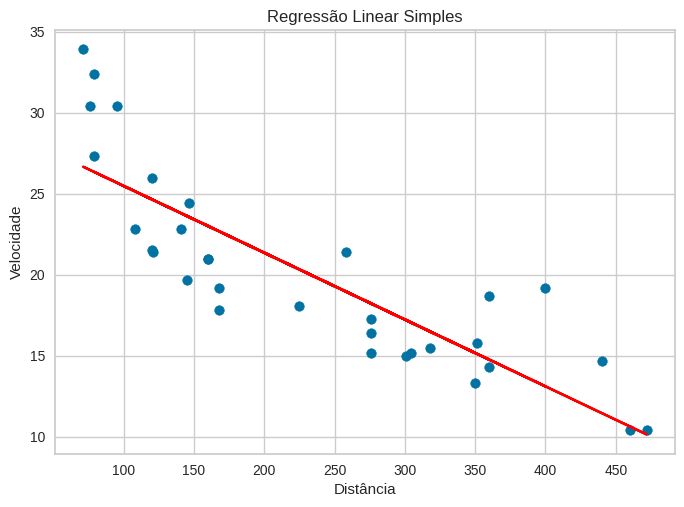

In [51]:
plt.scatter(x, y)
plt.plot(x, provisoes, color='red')
plt.title('Regressão Linear Simples')
plt.xlabel('Distância')
plt.ylabel('Velocidade')
plt.show()

In [53]:
# previsão somente pra um valor
modelo.predict([[200]]) # se tiver 200 cilindradas qual vai ser as milhas

array([41.39742057])

In [55]:
#criacao de novas variaveis x1 e y1
# 3 varriaveis dependentes pra prever mpg: cyl disp
x1 = base_car.iloc[:, 1:4].values
x1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [56]:
y1 = base_car.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(x1, y1)
modelo2.score(x1, y1)

0.7678877440928638

In [57]:
#criacao do modleo ajustado com mais stributos (regressao linear multipla)
modelo_ajustado2 = sm.ols(formula = 'mpg ~ cyl + disp + hp', data = base_car)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           5.05e-09
Time:                        15:26:51   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# previsão de um novo registro
nova = np.array([4, 200, 100])
nova = nova.reshape(1, -1)
modelo2.predict(nova)

array([24.03968887])